# 01. Load Dataset

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("/kaggle/input/customer-churn/customer_churn_dataset-training-master.csv")
test_data = pd.read_csv("/kaggle/input/customer-churn/customer_churn_dataset-testing-master.csv")

In [3]:
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
train_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# 02. Basic EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [8]:
train_data = train_data.dropna()

In [9]:
train_data['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [10]:
train_data['Churn'].value_counts(normalize=True) * 100

Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64

In [11]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

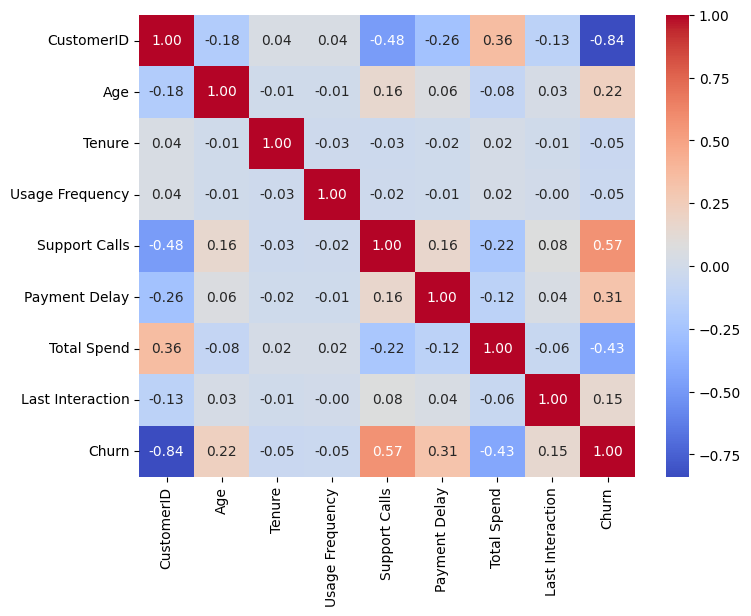

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [13]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

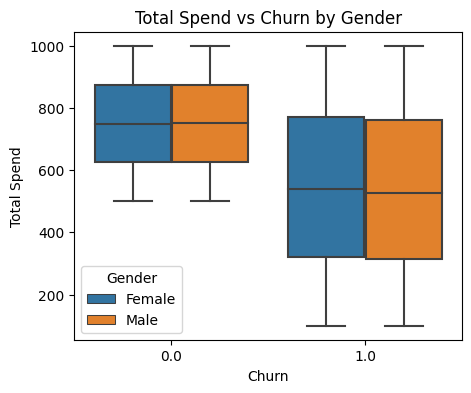

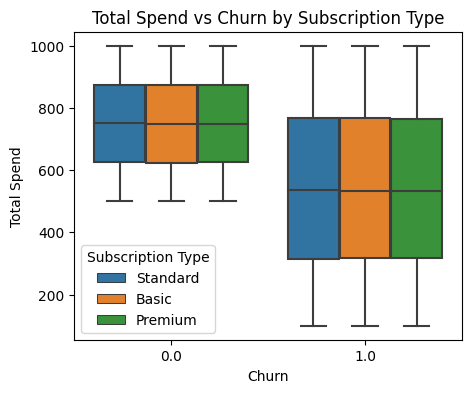

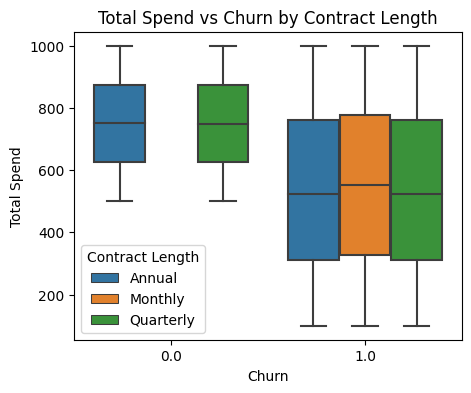

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='Churn', y='Total Spend', hue=col, data=train_data)
    plt.title(f'Total Spend vs Churn by {col}')
    plt.show()

# 03. Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### a) Encoding

In [16]:
train_data_encoded = pd.get_dummies(train_data, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

### b) Scaling

In [17]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

In [18]:
train_data_encoded[numeric_cols] = scaler.fit_transform(train_data_encoded[numeric_cols])

### c) Split -> Train / Validation

In [19]:
X = train_data_encoded.drop(['CustomerID', 'Churn'], axis=1)
y = train_data_encoded['Churn']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 04. ML Models (Classification)

In [21]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
)

### a) Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred = lr_model.predict(X_val)
y_prob = lr_model.predict_proba(X_val)[:,1]

In [25]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8933274354350267
Precision: 0.9233496714985922
Recall: 0.8854
F1 Score: 0.903976721629486
ROC-AUC: 0.9590268650928813
Confusion Matrix:
 [[34492  3675]
 [ 5730 44270]]


### b) KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred_knn = knn_model.predict(X_val)
y_prob_knn = knn_model.predict_proba(X_val)[:,1]

In [29]:
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Precision:", precision_score(y_val, y_pred_knn))
print("KNN Recall:", recall_score(y_val, y_pred_knn))
print("KNN F1 Score:", f1_score(y_val, y_pred_knn))
print("KNN ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

KNN Accuracy: 0.9594632912540974
KNN Precision: 0.9983041387600893
KNN Recall: 0.9301
KNN F1 Score: 0.9629959413567465
KNN ROC-AUC: 0.9862798593025388
KNN Confusion Matrix:
 [[38088    79]
 [ 3495 46505]]


### c) Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred_dt = dt_model.predict(X_val)
y_prob_dt = dt_model.predict_proba(X_val)[:,1]

In [33]:
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_val, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_val, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_val, y_pred_dt))
print("Decision Tree ROC-AUC:", roc_auc_score(y_val, y_prob_dt))

Decision Tree Accuracy: 0.9998412104302064
Decision Tree Precision: 0.99986
Decision Tree Recall: 0.99986
Decision Tree F1 Score: 0.99986
Decision Tree ROC-AUC: 0.9998382977441245


### d) Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [36]:
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:,1]

In [37]:
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Precision:", precision_score(y_val, y_pred_rf))
print("Random Forest Recall:", recall_score(y_val, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_val, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_val, y_prob_rf))

Random Forest Accuracy: 0.9996143681876439
Random Forest Precision: 0.9999399663811734
Random Forest Recall: 0.99938
Random Forest F1 Score: 0.9996599047733364
Random Forest ROC-AUC: 0.9999988945948071


### e) XGBoost

In [38]:
import xgboost as xgb

In [39]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:,1]

In [41]:
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_val, y_pred_xgb))
print("XGBoost Recall:", recall_score(y_val, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_val, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_val, y_prob_xgb))

XGBoost Accuracy: 0.9999206052151032
XGBoost Precision: 1.0
XGBoost Recall: 0.99986
XGBoost F1 Score: 0.999929995099657
XGBoost ROC-AUC: 0.9999993486519769


# 05. Compare Models

In [42]:
models_metrics = []

In [43]:
# Logistic Regression
models_metrics.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_val, y_pred),
    "Precision": precision_score(y_val, y_pred),
    "Recall": recall_score(y_val, y_pred),
    "F1 Score": f1_score(y_val, y_pred),
    "ROC-AUC": roc_auc_score(y_val, y_prob)
})

In [44]:
# KNN
models_metrics.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_val, y_pred_knn),
    "Precision": precision_score(y_val, y_pred_knn),
    "Recall": recall_score(y_val, y_pred_knn),
    "F1 Score": f1_score(y_val, y_pred_knn),
    "ROC-AUC": roc_auc_score(y_val, y_prob_knn)
})

In [45]:
# Decision Tree
models_metrics.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_val, y_pred_dt),
    "Precision": precision_score(y_val, y_pred_dt),
    "Recall": recall_score(y_val, y_pred_dt),
    "F1 Score": f1_score(y_val, y_pred_dt),
    "ROC-AUC": roc_auc_score(y_val, y_prob_dt)
})

In [46]:
# Random Forest
models_metrics.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_val, y_pred_rf),
    "Precision": precision_score(y_val, y_pred_rf),
    "Recall": recall_score(y_val, y_pred_rf),
    "F1 Score": f1_score(y_val, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_val, y_prob_rf)
})

In [47]:
# XGBoost
models_metrics.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_val, y_pred_xgb),
    "Precision": precision_score(y_val, y_pred_xgb),
    "Recall": recall_score(y_val, y_pred_xgb),
    "F1 Score": f1_score(y_val, y_pred_xgb),
    "ROC-AUC": roc_auc_score(y_val, y_prob_xgb)
})

In [48]:
comparison_df = pd.DataFrame(models_metrics)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.893327,0.923350,0.88540,0.903977,0.959027
1,KNN,0.959463,0.998304,0.93010,0.962996,0.986280
2,Decision Tree,0.999841,0.999860,0.99986,0.999860,0.999838
3,Random Forest,0.999614,0.999940,0.99938,0.999660,0.999999
4,XGBoost,0.999921,1.000000,0.99986,0.999930,0.999999


- *KNN* is the best model, with great performance and less risk of overfitting.

# 06. Save Model

In [49]:
import joblib
joblib.dump(knn_model, "knn_churn_model.pkl")

['knn_churn_model.pkl']